In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
frhttp://localhost:8888/notebooks/Untitled8.ipynb?kernel_name=python3#om sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  299
No of col =  13


In [4]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
select_col = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'platelets']

In [7]:
select_col_df = data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'platelets']]
select_col_df = select_col_df.describe()
select_col_df

,age,anaemia,creatinine_phosphokinase,diabetes,platelets
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,263358.029264
std,11.894809,0.496107,970.287881,0.494067,97804.236869
min,40.000000,0.000000,23.000000,0.000000,25100.000000
25%,51.000000,0.000000,116.500000,0.000000,212500.000000
50%,60.000000,0.000000,250.000000,0.000000,262000.000000
75%,70.000000,1.000000,582.000000,1.000000,303500.000000
max,95.000000,1.000000,7861.000000,1.000000,850000.000000


In [8]:
mean_value = select_col_df.iloc[1:2,:]
mean_value

,age,anaemia,creatinine_phosphokinase,diabetes,platelets
mean,60.833893,0.431438,581.839465,0.41806,263358.029264


In [9]:
mean_value = select_col_df.iloc[1:2,:].values[0]
mean_value

array([6.08338930e+01, 4.31438127e-01, 5.81839465e+02, 4.18060201e-01,
       2.63358029e+05])

In [10]:
# Replacing the values equal to 0 by the median
select_col = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'platelets']
for col in data[select_col]:
    data.replace({col: {0: data[col].median()}}, inplace=True)

    print(col,data.loc[:,col].median())

age 60.0
anaemia 0.0
creatinine_phosphokinase 250.0
diabetes 0.0
platelets 262000.0


In [11]:
data.loc[:,'platelets'].replace(0, data.loc[:,'age'].median())

0      265000.00
1      263358.03
2      162000.00
3      210000.00
4      327000.00
         ...    
294    155000.00
295    270000.00
296    742000.00
297    140000.00
298    395000.00
Name: platelets, Length: 299, dtype: float64

In [12]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [13]:
# x = data.describe()
# x.loc["count":"std"]
data.iloc[:,1:2].median()


anaemia    0.0
dtype: float64

In [15]:
data['DEATH_EVENT'].value_counts()


DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [16]:
print(len(data[data['DEATH_EVENT'] == 1]))
print(len(data[data['DEATH_EVENT'] == 0]))


96
203


In [34]:
yes = data[data['DEATH_EVENT'] == 1]
no = data[data['DEATH_EVENT'] == 0].iloc[0:203]

data = pd.concat([yes,no], axis = 0).sample(frac = 1)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
15,82.0,1,379,0,50,0,47000.0,1.3,136,1,0,13,1
139,50.0,0,1548,0,30,1,211000.0,0.8,138,1,0,108,0
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201,0
151,62.0,0,30,1,60,1,244000.0,0.9,139,1,0,117,0
87,65.0,1,68,1,60,1,304000.0,0.8,140,1,0,79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,55.0,0,2017,0,25,0,314000.0,1.1,138,1,0,214,1
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,1,40,1
143,61.0,1,84,0,40,1,229000.0,0.9,141,0,0,110,0
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1


In [35]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [36]:
data1 = data.iloc[: ,:-1]
data1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
15,82.0,1,379,0,50,0,47000.0,1.3,136,1,0,13
139,50.0,0,1548,0,30,1,211000.0,0.8,138,1,0,108
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
151,62.0,0,30,1,60,1,244000.0,0.9,139,1,0,117
87,65.0,1,68,1,60,1,304000.0,0.8,140,1,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...
246,55.0,0,2017,0,25,0,314000.0,1.1,138,1,0,214
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,1,40
143,61.0,1,84,0,40,1,229000.0,0.9,141,0,0,110
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7


In [37]:
data1.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608


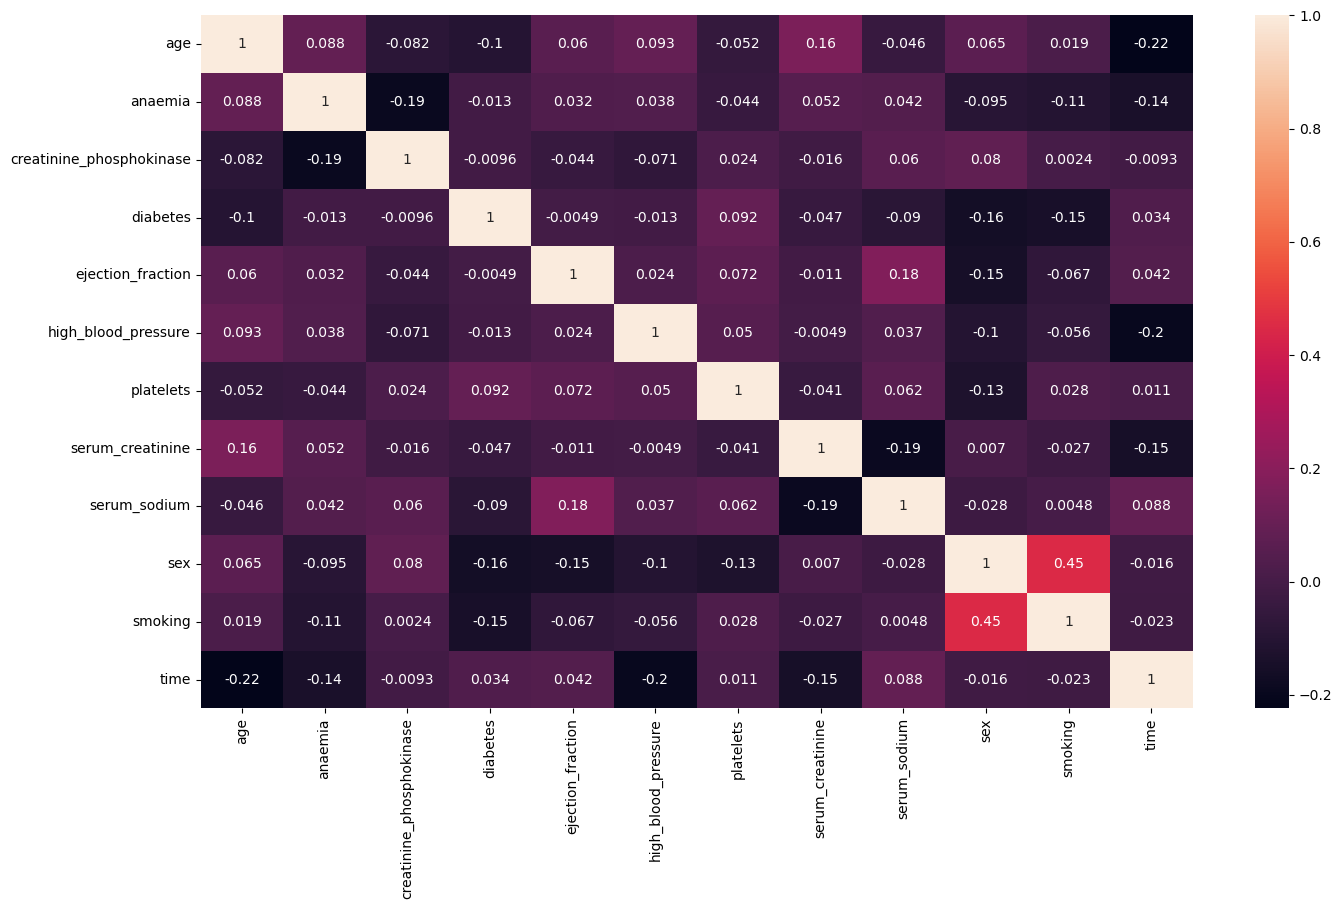

In [38]:
plt.figure(figsize=(16,9))
corr = data1.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [40]:
# training and normalization of data
X = data.iloc[:,:8]
Y = data.iloc[:,8:]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [41]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

# Create the base SVC model
svc = SVC()

# Wrap the SVC model in a MultiOutputClassifier to handle multiple output columns
multi_output_clf = MultiOutputClassifier(svc)

# Fit the model
multi_output_clf.fit(X_train, Y_train)

print("Multi-output model trained successfully.")


Multi-output model trained successfully.


In [42]:
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine
195,77.0,1,418,0,45,0,223000.00,1.80
289,90.0,1,337,0,38,0,390000.00,0.90
116,60.0,1,96,1,60,1,271000.00,0.70
269,40.0,0,582,1,35,0,222000.00,1.00
273,42.0,0,64,0,40,0,189000.00,0.70
261,62.0,1,655,0,40,0,283000.00,0.70
149,60.0,0,2261,0,35,1,228000.00,0.90
0,75.0,0,582,0,20,1,265000.00,1.90
291,60.0,0,320,0,35,0,133000.00,1.40
272,67.0,0,213,0,38,0,215000.00,1.20


In [43]:
Y_test

,serum_sodium,sex,smoking,time,DEATH_EVENT
195,145,1,0,180,1
289,144,0,0,256,0
116,136,0,0,94,0
269,132,1,0,244,0
273,140,1,0,245,0
261,133,0,0,233,0
149,136,1,0,115,0
0,130,1,0,4,1
291,139,1,0,258,0
272,133,0,0,245,0


In [44]:
print(X_train.shape)  # Should show (239, n_features)
print(Y_train.shape)  # Should show (239,) or (239, n_classes)



(239, 8)
(239, 5)


In [59]:
Y_pred = svc.predict(X_test)
Y_pred

array([137, 136, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137,
       136, 137, 136, 136, 137, 137, 137, 137, 137, 136, 137, 137, 136,
       137, 137, 137, 136, 137, 137, 137, 137, 137, 137, 137, 136, 137,
       137, 137, 137, 137, 137, 136, 136, 137, 137, 136, 137, 137, 136,
       137, 137, 136, 137, 137, 137, 137, 137], dtype=int64)

In [48]:
Y_pred = svc.predict(X_test)
Y_pred



array([137, 136, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137,
       136, 137, 136, 136, 137, 137, 137, 137, 137, 136, 137, 137, 136,
       137, 137, 137, 136, 137, 137, 137, 137, 137, 137, 137, 136, 137,
       137, 137, 137, 137, 137, 136, 136, 137, 137, 136, 137, 137, 136,
       137, 137, 136, 137, 137, 137, 137, 137], dtype=int64)

In [63]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming Y_test and Y_pred are defined
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred.shape)




Y_test shape: (60, 5)
Y_pred shape: (60,)


In [68]:
#train accu
Y_pred = svc.predict(X_train)
svc_accuracy1= round(accuracy_score(Y_train,Y_pred),4)*100 # Accuracy
svc_accuracy1

15.9

In [69]:
d = X_test.iloc[0:1]
d

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine
195,77.0,1,418,0,45,0,223000.0,1.8


In [70]:
Y_test.iloc[0:1]

,serum_sodium,sex,smoking,time,DEATH_EVENT
195,145,1,0,180,1


In [71]:
Y_pred = svc.predict(X_test.iloc[0:1])
Y_pred

array([137], dtype=int64)

In [72]:
age = float(input("Enter age = "))
anaemia = float(input("Enter anaemia = "))
creatinine_phosphokinase = float(input("Enter creatinine_phosphokinase = "))
diabetes = float(input("Enter diabetes = "))
ejection_fraction = float(input("Enter ejection_fraction = "))
high_blood_pressure = float(input("Enter high_blood_pressure = "))
platelets = float(input("Enter platelets = "))
serum_creatinine = float(input("Enter serum_creatinine = "))

new_data = {'age':[age],
            'anaemia':[anaemia],
            'creatinine_phosphokinase':[creatinine_phosphokinase],
            'diabetes':[diabetes],
            'ejection_fraction':[ejection_fraction],
            'high_blood_pressure':[high_blood_pressure],
            'platelets':[platelets],
            'serum_creatinine':[serum_creatinine]
            }
d = pd.DataFrame(new_data)

Enter age = 56
Enter anaemia = 77
Enter creatinine_phosphokinase = 12
Enter diabetes = 140
Enter ejection_fraction = 11
Enter high_blood_pressure = 150
Enter platelets = 566
Enter serum_creatinine = 88


In [73]:
d

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine
0,56.0,77.0,12.0,140.0,11.0,150.0,566.0,88.0


In [74]:
Y_score = svc.predict(d)
print(Y_score)

[136]


In [75]:
Y_pred = svc.predict(X_test)
Y_pred

array([137, 136, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137,
       136, 137, 136, 136, 137, 137, 137, 137, 137, 136, 137, 137, 136,
       137, 137, 137, 136, 137, 137, 137, 137, 137, 137, 137, 136, 137,
       137, 137, 137, 137, 137, 136, 136, 137, 137, 136, 137, 137, 136,
       137, 137, 136, 137, 137, 137, 137, 137], dtype=int64)

In [76]:
len(Y_pred)

60

In [84]:
multi_target_svc.fit(X_train, Y_train)  # Train the model first



MultiOutputClassifier(estimator=SVC(probability=True))

In [93]:
Y_pred = multi_target_svc.predict(X_test)  # Now predict on the test set


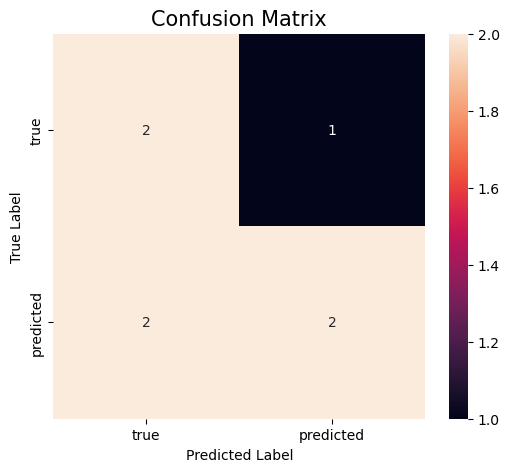

In [100]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sample true labels and predicted labels for multiple binary outputs
# Each output can be considered as a separate binary classifier
y_true = np.array([136, 137, 137, 136, 137, 136, 137])
y_pred = np.array([136, 137, 136, 136, 137, 137, 136])

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d',
             xticklabels=['true', 'predicted'],
             yticklabels=['true', 'predicted'])
plt.title('Confusion Matrix',fontsize = 15)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




In [104]:
print("yes",len(Y_test[Y_test['DEATH_EVENT'] == True]))

yes 21


In [105]:
print("No",len(Y_test[Y_test['DEATH_EVENT'] == False]))

No 39


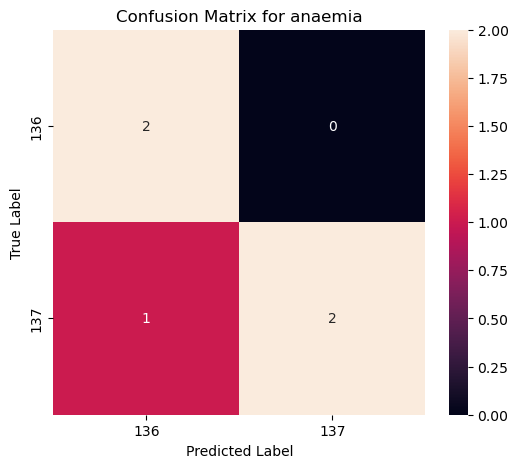

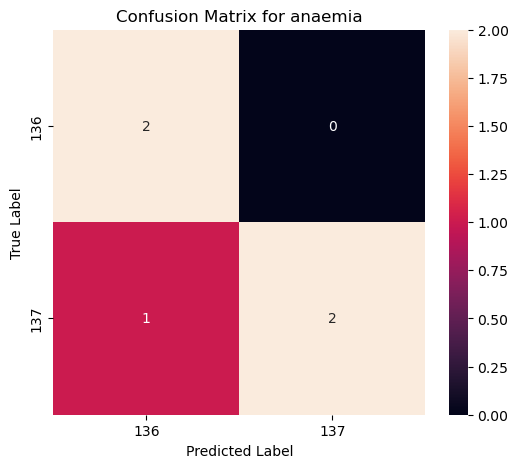

In [110]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sample true labels and predicted labels for a multiclass-multioutput problem
# Each row corresponds to an instance, and each column corresponds to an output
Y_test = np.array([[136, 137],
                   [137, 137],
                   [137, 136],
                   [137, 137],
                   [136, 136]])

Y_pred = np.array([[136, 137],
                   [137, 136],
                   [137, 136],
                   [136, 137],
                   [136, 136]])

# Iterate through each output column and compute confusion matrix
for i in range(Y_test.shape[1]):
    cm = confusion_matrix(Y_test[:, i], Y_pred[:, i])
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', 
                xticklabels=np.unique(Y_test), 
                yticklabels=np.unique(Y_test))


    plt.title(f'Confusion Matrix for anaemia')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [113]:
import numpy as np
from sklearn.metrics import classification_report

# Sample true labels and predicted labels for a multiclass-multioutput problem
Y_test = np.array([[136, 137],
                   [137, 136],
                   [137, 136],
                   [137, 137],
                   [136, 136]])

Y_pred = np.array([[136, 137],
                   [137, 136],
                   [137, 136],
                   [136, 137],
                   [136, 136]])

# Generate classification report for each output
for i in range(Y_test.shape[1]):
    report = classification_report(Y_test[:, i], Y_pred[:, i], 
                                   target_names=[f'Class {j}' for j in np.unique(Y_test[:, i])])
    print(f'Classification Report for anaemia:\n')
    print(report)


Classification Report for anaemia:

              precision    recall  f1-score   support

   Class 136       0.67      1.00      0.80         2
   Class 137       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Classification Report for anaemia:

              precision    recall  f1-score   support

   Class 136       1.00      1.00      1.00         3
   Class 137       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [114]:
Y_pred

array([[136, 137],
       [137, 136],
       [137, 136],
       [136, 137],
       [136, 136]])